In [1030]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import ast

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer, FeatureHasher
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [1031]:
spindtTracks = pd.read_csv("JSON Files/Exported CSV Files/spindtTracks.csv")
artists = pd.read_csv("JSON Files/Exported CSV Files/artists.csv")
songs = pd.read_csv("JSON Files/Exported CSV Files/songs.csv")
songFeatures = pd.read_csv("spotify_audio_features (1).csv")

In [1032]:
songs = pd.merge(songs, songFeatures, on='id')

In [1033]:
songs

,Unnamed: 0,album,artists,available_markets,duration_ms_x,explicit,external_ids,href,id,name,...,valence,tempo,type,uri_y,track_href,analysis_url,duration_ms_y,time_signature,track_name,artist_name
0,0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",226863,True,{'isrc': 'USEE10414022'},https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),...,0.810,125.461,audio_features,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott
1,1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",198800,False,{'isrc': 'USJI10301005'},https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,6I9VzXrHxO9rA9A5euc8Ak,Toxic,...,0.924,143.040,audio_features,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,https://api.spotify.com/v1/audio-analysis/6I9V...,198800,4,Toxic,Britney Spears
2,2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['CH', 'LI']",235933,False,{'isrc': 'USSM10305425'},https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love (feat. Jay-Z),...,0.701,99.259,audio_features,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,https://api.spotify.com/v1/audio-analysis/0WqI...,235933,4,Crazy In Love,Beyoncé
3,3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",267266,False,{'isrc': 'USJI10200367'},https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,...,0.817,100.972,audio_features,spotify:track:1AWQoqb9bSvzTjaLralEkT,https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,https://api.spotify.com/v1/audio-analysis/1AWQ...,267267,4,Rock Your Body,Justin Timberlake
4,4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[],227600,False,{'isrc': 'USMC10000393'},https://api.spotify.com/v1/tracks/1lzr43nnXAij...,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,...,0.654,94.759,audio_features,spotify:track:1lzr43nnXAijIGYnCT8M8H,https://api.spotify.com/v1/tracks/1lzr43nnXAij...,https://api.spotify.com/v1/audio-analysis/1lzr...,227600,4,It Wasn't Me,Shaggy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18186,34428,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",193000,False,{'isrc': 'QM2PV1638588'},https://api.spotify.com/v1/tracks/1lgWOtohsjX5...,1lgWOtohsjX526FK6Ch5B8,that one song,...,0.682,98.072,audio_features,spotify:track:1lgWOtohsjX526FK6Ch5B8,https://api.spotify.com/v1/tracks/1lgWOtohsjX5...,https://api.spotify.com/v1/audio-analysis/1lgW...,193001,4,that one song,gnash
18187,34429,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",174000,True,{'isrc': 'QM2PV1638587'},https://api.spotify.com/v1/tracks/50J9NhjECm19...,50J9NhjECm19ZBadwJembA,fuck me up,...,0.311,129.895,audio_features,spotify:track:50J9NhjECm19ZBadwJembA,https://api.spotify.com/v1/tracks/50J9NhjECm19...,https://api.spotify.com/v1/audio-analysis/50J9...,174000,4,fuck me up,gnash
18188,34433,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",203675,False,{'isrc': 'TCABR1386156'},https://api.spotify.com/v1/tracks/0KMrYUEfexga...,0KMrYUEfexgam36li6d9F0,Oh My Love,...,0.157,145.264,audio_features,spotify:trac

In [1034]:
spindtTracks = pd.merge(spindtTracks, songFeatures, on='id', how='left')

In [1035]:
spindtTracks = spindtTracks.drop(['Unnamed: 0', 'available_markets', 'track_number', 'type', 'uri', 'track_href', 'duration_ms_y', 'analysis_url', 'track_name'], axis=1)

In [1036]:
artists = artists.drop(['Unnamed: 0', 'href'], axis=1)

In [1037]:
artists['artist_name'] = artists['name']

In [1038]:
artists.drop('name', axis=1, inplace=True)

In [1039]:
songs = songs.drop(['Unnamed: 0', 'type', 'uri_y', 'track_href', 'duration_ms_y', 'track_name', 'analysis_url'], axis=1)

In [1040]:
spindtTracks

,album,artists,duration_ms_x,explicit,id,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,257920,False,51ggEZWbFP5dMdWjGCDYTk,Dunes,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,201612,False,6p5LBZkLRIeVhbLh0w7EuP,Future People,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,232546,True,2lrRWbiHPdBicufAqrGN3r,Don't Wanna Fight,0,0.606,0.915,10.0,-3.292,0.0,0.1660,0.2590,0.107000,0.1050,0.551,100.433,4.0,Alabama Shakes
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,243466,False,7Gz1adaLeIHNOqJPvfnncD,Gimme All Your Love,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,308066,False,17ZnveSDBpG9QtL7zLJNPy,Only For You,3,0.677,0.649,10.0,-5.906,1.0,0.0311,0.0442,0.069500,0.1040,0.787,82.016,4.0,Heartless Bastards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,330419,False,0DzNSw9Pp1yKJZynNBM8uy,Queen of the Surface Streets,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,211226,False,6qZjm61s6u8Ead9sWxCDro,Elephant,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,252139,False,5mqr5kF7oNDdcG01qazSqK,Had Ten Dollaz,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,290106,False,1rO4Ew8dCbYWqJ3L6DmJDo,All the Sand in all the Sea,35,0.466,0.898,5.0,-5.947,1.0,0.0863,0.1420,0.000278,0.0620,0.228,126.313,4.0,DeVotchKa


In [1041]:
spindtTracksAnalysis = spindtTracks

In [1042]:
artists['followers']

followersArr = []
for i in artists['followers']:
    followersArr.append(ast.literal_eval(i)['total'])

In [1043]:
artists['followers'] = followersArr

In [1044]:
spindtTracksAnalysis = pd.merge(spindtTracksAnalysis, artists[['artist_name', 'genres', 'followers']], on='artist_name', how='left')
spindtTracksAnalysis = spindtTracksAnalysis.drop(['id', 'artists'], axis=1)

In [1045]:
spindtTracksAnalysis

,album,duration_ms_x,explicit,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name,genres,followers
0,"{'album_type': 'album', 'artists': [{'external...",257920,False,Dunes,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'album_type': 'single', 'artists': [{'externa...",201612,False,Future People,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'album_type': 'album', 'artists': [{'external...",232546,True,Don't Wanna Fight,0,0.606,0.915,10.0,-3.292,0.0,0.1660,0.2590,0.107000,0.1050,0.551,100.433,4.0,Alabama Shakes,"['alabama indie', 'modern blues rock', 'rock']",1604741.0
3,"{'album_type': 'album', 'artists': [{'external...",243466,False,Gimme All Your Love,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'album_type': 'album', 'artists': [{'external...",308066,False,Only For You,3,0.677,0.649,10.0,-5.906,1.0,0.0311,0.0442,0.069500,0.1040,0.787,82.016,4.0,Heartless Bastards,['stomp and holler'],179423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"{'album_type': 'album', 'artists': [{'external...",330419,False,Queen of the Surface Streets,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,"{'album_type': 'album', 'artists': [{'external...",211226,False,Elephant,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,"{'album_type': 'single', 'artists': [{'externa...",252139,False,Had Ten Dollaz,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,"{'album_type': 'album', 'artists': [{'external...",290106,False,All the Sand in all the Sea,35,0.466,0.898,5.0,-5.947,1.0,0.0863,0.1420,0.000278,0.0620,0.228,126.313,4.0,DeVotchKa,NaN,NaN


In [1046]:
songs

,album,artists,available_markets,duration_ms_x,explicit,external_ids,href,id,name,popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",226863,True,{'isrc': 'USEE10414022'},https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),69,...,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,4,Missy Elliott
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",198800,False,{'isrc': 'USJI10301005'},https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,6I9VzXrHxO9rA9A5euc8Ak,Toxic,86,...,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,4,Britney Spears
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['CH', 'LI']",235933,False,{'isrc': 'USSM10305425'},https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love (feat. Jay-Z),20,...,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,4,Beyoncé
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",267266,False,{'isrc': 'USJI10200367'},https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,82,...,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,4,Justin Timberlake
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[],227600,False,{'isrc': 'USMC10000393'},https://api.spotify.com/v1/tracks/1lzr43nnXAij...,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,9,...,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,4,Shaggy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18186,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",193000,False,{'isrc': 'QM2PV1638588'},https://api.spotify.com/v1/tracks/1lgWOtohsjX5...,1lgWOtohsjX526FK6Ch5B8,that one song,37,...,-8.462,1,0.2820,0.32800,0.000000,0.1030,0.682,98.072,4,gnash
18187,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",174000,True,{'isrc': 'QM2PV1638587'},https://api.spotify.com/v1/tracks/50J9NhjECm19...,50J9NhjECm19ZBadwJembA,fuck me up,27,...,-6.599,0,0.3720,0.06580,0.000001,0.0889,0.311,129.895,4,gnash
18188,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",203675,False,{'isrc': 'TCABR1386156'},https://api.spotify.com/v1/tracks/0KMrYUEfexga...,0KMrYUEfexgam36li6d9F0,Oh My Love,29,...,-11.947,1,0.0465,0.77000,0.042400,0.1330,0.157,145.264,3,Layla
18189,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[],237007,False,{'isrc': 'FRX451581813'},https://api.spotify.com/v1/tracks/1msfqzqHggvi...,1msfqzqHggvi1mlCT4Z7O5,Diamond Child,0,...,-9.269,1,0.0641,0.51300,0.001550,0.0988,0.131,81.988,4,Aayushi


In [1047]:
songsAnalysis = songs.drop(['id', 'href', 'external_ids', 'available_markets', 'track_number'], axis=1)

In [1048]:
songsAlbums = songsAnalysis['album']

In [1049]:
songsAlbumsArr = []
for i in songsAlbums:
    songsAlbumsArr.append(ast.literal_eval(i)['name'])

In [1050]:
songsAnalysis['album'] = songsAlbumsArr

In [1051]:
songsAnalysis['album'].value_counts()

Greatest Hits                                                            63
Original Album Classics                                                  39
Les Misérables: The Motion Picture Soundtrack Deluxe (Deluxe Edition)    36
Frozen (Original Motion Picture Soundtrack / Deluxe Edition)             36
Hamilton (Original Broadway Cast Recording)                              26
                                                                         ..
Something Special                                                         1
Let's Face It                                                             1
The Bright Side                                                           1
Sunshine & Kool-Aid                                                       1
Roadhouse 01                                                              1
Name: album, Length: 10336, dtype: int64

In [1052]:
songsAnalysis['artist_name'].value_counts()

Drake               110
John Mayer           75
Kendrick Lamar       72
Eminem               64
Kanye West           64
                   ... 
Thomas Csorba         1
John Vincent III      1
Connor Zwetsch        1
Austin Plaine         1
Allan Rayman          1
Name: artist_name, Length: 5350, dtype: int64

In [1053]:
songsAnalysis['album'].nunique()

10336

In [1054]:
songsAnalysis = pd.merge(songsAnalysis, artists[['artist_name', 'genres', 'followers']], on='artist_name', how='left')

In [1055]:
songsAnalysis = songsAnalysis.sort_values(by=['popularity'], ascending=False)
songsAnalysis.drop_duplicates(subset=['name'], keep='first', inplace=True)
songsAnalysis = songsAnalysis.drop('artists', axis=1)

In [1056]:
songsAnalysis

,album,duration_ms_x,explicit,name,popularity,uri_x,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name,genres,followers
5228,I Love You.,240400,False,Sweater Weather,92,spotify:track:2QjOHCTQ1Jl3zawyYOpxh6,0.612,0.807,10,-2.810,...,0.0336,0.04950,0.017700,0.1010,0.398,124.053,4,The Neighbourhood,"['modern alternative rock', 'modern rock', 'pop']",15515243.0
3172,Parachutes,266773,False,Yellow,92,spotify:track:3AJwUDP919kvQ9QcozQPxg,0.429,0.661,11,-7.227,...,0.0281,0.00239,0.000121,0.2340,0.285,173.372,4,Coldplay,"['permanent wave', 'pop']",49148252.0
9178,Flower Boy,180386,True,See You Again (feat. Kali Uchis),91,spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,...,0.0959,0.37100,0.000007,0.1090,0.620,78.558,4,"Tyler, The Creator","['hip hop', 'rap']",14247402.0
6242,Blonde,184516,False,Pink + White,91,spotify:track:3xKsf9qdS1CyvXSMEid6g8,0.545,0.545,9,-7.362,...,0.1070,0.66700,0.000055,0.4170,0.549,159.940,3,Frank Ocean,"['lgbtq+ hip hop', 'neo soul']",13118418.0
11808,Long Way Down (Deluxe),244360,True,Another Love,91,spotify:track:3JvKfv6T31zO0ini8iNItO,0.445,0.537,4,-8.532,...,0.0400,0.69500,0.000017,0.0944,0.131,122.769,4,Tom Odell,['chill pop'],3708194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,The Stand Ins,331800,False,Lost Coastlines,0,spotify:track:2016zoJ6TxYzqjwQNMh3kw,0.533,0.783,9,-4.992,...,0.0314,0.04010,0.000000,0.1090,0.702,109.899,4,Okkervil River,"['austindie', 'chamber pop', 'indie rock', 'me...",121213.0
2876,Sublime (Deluxe Edition),293293,False,Jailhouse,0,spotify:track:4GCd7d7GE23S9Xla1mqaqo,0.661,0.751,9,-7.007,...,0.0760,0.00647,0.000302,0.2370,0.696,79.108,4,Sublime,"['rap rock', 'reggae fusion', 'ska mexicano', ...",2679770.0
12390,Sincerely Yours [Bonus Track Version],217853,True,What You 'Bout (feat. Wiz Khalifa & Berner),0,spotify:track:7dBFvdgSyrroK2Gj5kdRdX,0.871,0.538,1,-7.667,...,0.0450,0.04020,0.006270,0.1190,0.120,97.047,4,Iamsu!,['cali rap'],274581.0
12385,Animals,198320,True,Animals - Victor Niglio & Martin Garrix Festiv...,0,spotify:track:3o2xsvJ8Ul2V3olPCzXify,0.649,0.875,1,-4.318,...,0.0403,0.00397,0.852000,0.0290,0.377,139.965,4,Martin Garrix,"['dutch edm', 'edm', 'pop', 'pop dance', 'prog...",14930970.0


In [1057]:
unscaledSongsAnalysisData = pd.DataFrame(songsAnalysis)
unscaledSongsAnalysisData.dropna(inplace=True)
unscaledSongsAnalysisData.reset_index(inplace=True)
unscaledSongsAnalysisData.drop(['explicit', 'index', 'uri_x'], axis=1, inplace=True)

In [1058]:
scaler = MinMaxScaler()
numerical_columns = songsAnalysis.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = songsAnalysis.drop('explicit', axis=1).select_dtypes(include=['object']).columns.tolist()
binary_columns = songsAnalysis['explicit']
songsAnalysis[numerical_columns] = scaler.fit_transform(songsAnalysis[numerical_columns])

In [1059]:
songsAnalysis = songsAnalysis.join(pd.get_dummies(songsAnalysis['explicit']))
songsAnalysis.dropna(inplace=True)
songsAnalysis.reset_index(inplace=True)
songsAnalysis.drop(['explicit', 'index', 'uri_x'], axis=1, inplace=True)
# songsAnalysis.drop(['index', 'uri_x'], axis=1, inplace=True)

In [1060]:
songsAnalysis

,album,duration_ms_x,name,popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist_name,genres,followers,False,True
0,I Love You.,0.195560,Sweater Weather,1.00000,0.619433,0.807150,0.909091,0.891828,1.0,0.035257,...,0.017933,0.101101,0.402020,0.565685,0.8,The Neighbourhood,"['modern alternative rock', 'modern rock', 'pop']",0.137250,1,0
1,Parachutes,0.217013,Yellow,1.00000,0.434211,0.660503,1.000000,0.783139,1.0,0.029486,...,0.000123,0.234234,0.287879,0.790581,0.8,Coldplay,"['permanent wave', 'pop']",0.434773,1,0
2,Flower Boy,0.146740,See You Again (feat. Kali Uchis),0.98913,0.564777,0.558051,0.545455,0.734049,1.0,0.100630,...,0.000008,0.109109,0.626263,0.358227,0.8,"Tyler, The Creator","['hip hop', 'rap']",0.126035,0,1
3,Blonde,0.150099,Pink + White,0.98913,0.551619,0.543989,0.818182,0.779817,1.0,0.112277,...,0.000056,0.417417,0.554545,0.729331,0.6,Frank Ocean,"['lgbtq+ hip hop', 'neo soul']",0.116047,1,0
4,Long Way Down (Deluxe),0.198781,Another Love,0.98913,0.450405,0.535954,0.363636,0.751027,0.0,0.041973,...,0.000017,0.094494,0.132323,0.559830,0.8,Tom Odell,['chill pop'],0.032803,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17547,The Stand Ins,0.269911,Lost Coastlines,0.00000,0.539474,0.783043,0.818182,0.838136,1.0,0.032949,...,0.000000,0.109109,0.709091,0.501142,0.8,Okkervil River,"['austindie', 'chamber pop', 'indie rock', 'me...",0.001072,1,0
17548,Sublime (Deluxe Edition),0.238587,Jailhouse,0.00000,0.669028,0.750901,0.818182,0.788553,1.0,0.079748,...,0.000306,0.237237,0.703030,0.360735,0.8,Sublime,"['rap rock', 'reggae fusion', 'ska mexicano', ...",0.023706,1,0
17549,Sincerely Yours [Bonus Track Version],0.177218,What You 'Bout (feat. Wiz Khalifa & Berner),0.00000,0.881579,0.536958,0.090909,0.772312,0.0,0.047219,...,0.006353,0.119119,0.121212,0.442537,0.8,Iamsu!,['cali rap'],0.002429,0,1
17550,Animals,0.161329,Animals - Victor Niglio & Martin Garrix Festiv...,0.00000,0.656883,0.875451,0.090909,0.854721,1.0,0.042288,...,0.863222,0.029029,0.380808,0.638244,0.8,Martin Garrix,"['dutch edm', 'edm', 'pop', 'pop dance', 'prog...",0.132082,0,1


In [1061]:
# Get individual genres sorted by occurrences
genreList = []
for genre in songsAnalysis['genres']:
    genreList.append(genre)

uniqueGenres = []
for i in range(len(genreList)):
    for genre in ast.literal_eval(genreList[i]):
        uniqueGenres.append(genre)

uniqueGenres = pd.DataFrame(uniqueGenres)
genre_counts = uniqueGenres[0].value_counts()
uniqueGenres = pd.DataFrame(genre_counts)
uniqueGenres.reset_index(inplace=True)
uniqueGenres.columns = ['genre', 'count']
uniqueGenres.sort_values(by='count', ascending=False, inplace=True)
uniqueGenres.drop_duplicates(keep='first', inplace=True)
uniqueGenres.reset_index(inplace=True)
uniqueGenres.drop('index', axis=1, inplace=True)

In [1062]:
def find_most_common_genre(genre_list):

    if len(genre_list) == 0:
        return None

    # Iterate through each genre in the list
    most_common_genre = None
    lowest_index = float('inf')  # Initialize with positive infinity
    for genre in ast.literal_eval(genre_list):
        if genre in uniqueGenres['genre'].values:
            index_in_sorted = uniqueGenres.index[uniqueGenres['genre'] == genre].tolist()[0]
            if index_in_sorted < lowest_index:
                lowest_index = index_in_sorted
                most_common_genre = genre
    return most_common_genre

# Apply the function to each row in dataset
songsAnalysis['single_genre'] = songsAnalysis['genres'].apply(find_most_common_genre)

In [1063]:
songsAnalysisData = songsAnalysis.drop(['name', 'genres'], axis=1)

In [1064]:
songsAnalysisData

,album,duration_ms_x,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name,followers,False,True,single_genre
0,I Love You.,0.195560,1.00000,0.619433,0.807150,0.909091,0.891828,1.0,0.035257,0.049698,0.017933,0.101101,0.402020,0.565685,0.8,The Neighbourhood,0.137250,1,0,pop
1,Parachutes,0.217013,1.00000,0.434211,0.660503,1.000000,0.783139,1.0,0.029486,0.002398,0.000123,0.234234,0.287879,0.790581,0.8,Coldplay,0.434773,1,0,pop
2,Flower Boy,0.146740,0.98913,0.564777,0.558051,0.545455,0.734049,1.0,0.100630,0.372489,0.000008,0.109109,0.626263,0.358227,0.8,"Tyler, The Creator",0.126035,0,1,rap
3,Blonde,0.150099,0.98913,0.551619,0.543989,0.818182,0.779817,1.0,0.112277,0.669678,0.000056,0.417417,0.554545,0.729331,0.6,Frank Ocean,0.116047,1,0,neo soul
4,Long Way Down (Deluxe),0.198781,0.98913,0.450405,0.535954,0.363636,0.751027,0.0,0.041973,0.697791,0.000017,0.094494,0.132323,0.559830,0.8,Tom Odell,0.032803,0,1,chill pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17547,The Stand Ins,0.269911,0.00000,0.539474,0.783043,0.818182,0.838136,1.0,0.032949,0.040260,0.000000,0.109109,0.709091,0.501142,0.8,Okkervil River,0.001072,1,0,indie rock
17548,Sublime (Deluxe Edition),0.238587,0.00000,0.669028,0.750901,0.818182,0.788553,1.0,0.079748,0.006495,0.000306,0.237237,0.703030,0.360735,0.8,Sublime,0.023706,1,0,reggae fusion
17549,Sincerely Yours [Bonus Track Version],0.177218,0.00000,0.881579,0.536958,0.090909,0.772312,0.0,0.047219,0.040360,0.006353,0.119119,0.121212,0.442537,0.8,Iamsu!,0.002429,0,1,cali rap
17550,Animals,0.161329,0.00000,0.656883,0.875451,0.090909,0.854721,1.0,0.042288,0.003985,0.863222,0.029029,0.380808,0.638244,0.8,Martin Garrix,0.132082,0,1,pop


In [1065]:
# le = LabelEncoder()
# songsAnalysisData['single_genre'] = le.fit_transform(songsAnalysisData['single_genre'])
# songsAnalysisData['album'] = le.fit_transform(songsAnalysisData['album'])
# songsAnalysisData['artist_name'] = le.fit_transform(songsAnalysisData['artist_name'])
songsAnalysisData.drop(['single_genre', 'album', 'artist_name', 'time_signature'], axis=1, inplace=True)

In [1066]:
scalerMM = MinMaxScaler()
numerical_columns = songsAnalysisData.select_dtypes(include=['float64', 'int64']).columns.tolist()
songsAnalysisData[numerical_columns] = scalerMM.fit_transform(songsAnalysisData[numerical_columns])

In [1067]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(songsAnalysisData)

In [1068]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=7, linkage='ward')
clusters = hierarchical_cluster.fit_predict(songsAnalysisData)

In [1069]:
silhouette_avg = silhouette_score(tsne_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3703201413154602


In [1070]:
unique_clusters = np.unique(clusters)
cluster_features = {}

for cluster_label in unique_clusters:
    cluster_mask = (clusters == cluster_label)
    cluster_data = songsAnalysisData[cluster_mask]
    cluster_mean = np.mean(cluster_data, axis=0)  # Compute mean along columns (features)
    cluster_features[cluster_label] = cluster_mean

In [1071]:
cluster_features

{0: duration_ms_x       0.182527
 popularity          0.343344
 danceability        0.534603
 energy              0.433300
 key                 0.480046
 loudness            0.705171
 mode                1.000000
 speechiness         0.057387
 acousticness        0.630097
 instrumentalness    0.174413
 liveness            0.170389
 valence             0.418790
 tempo               0.533950
 followers           0.058176
 False               1.000000
 True                0.000000
 dtype: float64,
 1: duration_ms_x       0.186845
 popularity          0.400313
 danceability        0.697066
 energy              0.661237
 key                 0.413356
 loudness            0.803149
 mode                1.000000
 speechiness         0.189609
 acousticness        0.158359
 instrumentalness    0.011106
 liveness            0.212947
 valence             0.466318
 tempo               0.555004
 followers           0.085664
 False               0.000000
 True                1.000000
 dtype: float64,


In [1072]:
# hierarchical_cluster_tsne = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='ward')
hierarchical_cluster_tsne = AgglomerativeClustering(n_clusters=11, linkage='ward')
clusters2 = hierarchical_cluster_tsne.fit_predict(tsne_data)

In [1073]:
silhouette_avg = silhouette_score(tsne_data, clusters2)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4187954366207123


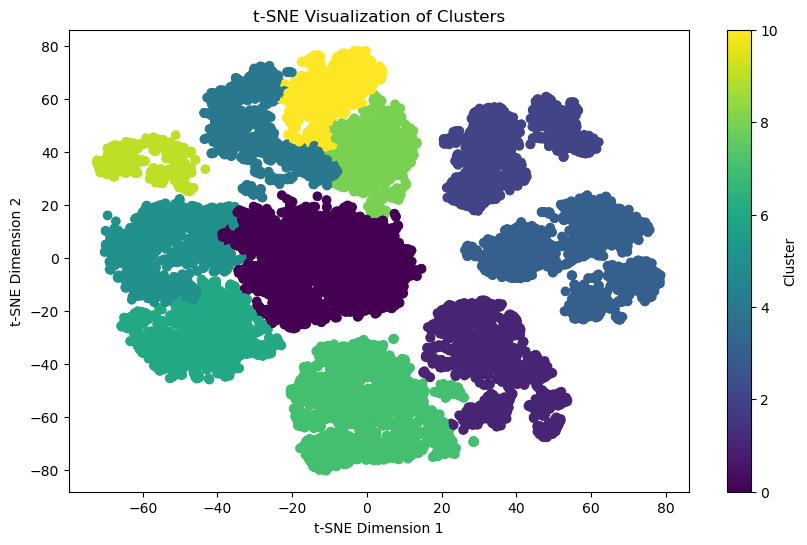

In [1074]:
# Visualize the clusters using t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusters2, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

In [1075]:
unique_clusters = np.unique(clusters2)
cluster_features = {}

for cluster_label in unique_clusters:
    cluster_mask = (clusters2 == cluster_label)
    cluster_data = unscaledSongsAnalysisData[cluster_mask]
    cluster_mean = np.mean(cluster_data, axis=0)  # Compute mean along columns (features)
    cluster_features[cluster_label] = cluster_mean

In [1076]:
cluster_features

{0: duration_ms_x       2.331720e+05
 popularity          5.318790e+01
 danceability        5.769574e-01
 energy              7.219958e-01
 key                 7.550019e+00
 loudness           -6.318372e+00
 mode                1.000000e+00
 speechiness         6.202145e-02
 acousticness        1.216249e-01
 instrumentalness    9.197893e-03
 liveness            1.807439e-01
 valence             5.453823e-01
 tempo               1.243689e+02
 time_signature      3.957398e+00
 followers           4.957565e+06
 dtype: float64,
 1: duration_ms_x       2.372654e+05
 popularity          4.342489e+00
 danceability        5.826143e-01
 energy              6.619733e-01
 key                 5.743834e+00
 loudness           -7.498834e+00
 mode                0.000000e+00
 speechiness         7.633044e-02
 acousticness        2.267440e-01
 instrumentalness    1.363781e-01
 liveness            1.910414e-01
 valence             4.767848e-01
 tempo               1.208127e+02
 time_signature      3.93

In [1077]:
spindtTracksAnalysis = spindtTracksAnalysis.join(pd.get_dummies(spindtTracksAnalysis['explicit']))
spindtTracksAnalysis.dropna(inplace=True)
spindtTracksAnalysis.reset_index(inplace=True)
spindtTracksAnalysis.drop(['explicit', 'index'], axis=1, inplace=True)

In [1078]:
spindtTracksAnalysis

,album,duration_ms_x,name,popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist_name,genres,followers,False,True
0,"{'album_type': 'album', 'artists': [{'external...",232546,Don't Wanna Fight,0,0.606,0.915,10.0,-3.292,0.0,0.1660,...,0.107000,0.1050,0.551,100.433,4.0,Alabama Shakes,"['alabama indie', 'modern blues rock', 'rock']",1604741.0,0,1
1,"{'album_type': 'album', 'artists': [{'external...",308066,Only For You,3,0.677,0.649,10.0,-5.906,1.0,0.0311,...,0.069500,0.1040,0.787,82.016,4.0,Heartless Bastards,['stomp and holler'],179423.0,1,0
2,"{'album_type': 'album', 'artists': [{'external...",181259,Back Pocket,67,0.839,0.585,2.0,-7.738,1.0,0.1530,...,0.002810,0.0435,0.890,89.821,4.0,Vulfpeck,"['ann arbor indie', 'funk rock', 'instrumental...",894503.0,1,0
3,"{'album_type': 'album', 'artists': [{'external...",238560,River,0,0.658,0.179,8.0,-10.866,1.0,0.0448,...,0.000000,0.1700,0.191,128.128,4.0,Leon Bridges,"['modern blues', 'neo soul', 'soul']",1630986.0,1,0
4,"{'album_type': 'album', 'artists': [{'external...",243160,Two Weeks,2,0.537,0.712,5.0,-5.597,1.0,0.0286,...,0.005680,0.0800,0.704,159.871,4.0,Grizzly Bear,"['art pop', 'baroque pop', 'brooklyn indie', '...",836535.0,1,0
5,"{'album_type': 'single', 'artists': [{'externa...",205388,Dearly Departed (Live at Pandora),28,0.718,0.214,7.0,-15.889,1.0,0.1320,...,0.000000,0.0441,0.540,87.105,4.0,Shakey Graves,"['austin americana', 'austindie', 'indie folk'...",530449.0,1,0
6,"{'album_type': 'album', 'artists': [{'external...",234800,Where'd All the Time Go?,81,0.454,0.820,2.0,-4.193,1.0,0.0567,...,0.000969,0.1150,0.575,166.303,4.0,Dr. Dog,"['chamber pop', 'indie rock', 'modern folk roc...",518829.0,1,0
7,"{'album_type': 'album', 'artists': [{'external...",289093,Pulaski at Night,58,0.446,0.643,7.0,-7.925,1.0,0.0561,...,0.000818,0.0951,0.531,99.608,4.0,Andrew Bird,"['baroque pop', 'chamber pop', 'chicago indie'...",579337.0,1,0
8,"{'album_type': 'album', 'artists': [{'external...",228055,Bring My Baby Back,40,0.574,0.800,1.0,-5.686,0.0,0.0405,...,0.001570,0.4240,0.421,73.588,4.0,Dr. Dog,"['chamber pop', 'indie rock', 'modern folk roc...",518829.0,1,0
9,"{'album_type': 'album', 'artists': [{'external...",218413,Are You Serious,52,0.749,0.480,0.0,-8.374,1.0,0.0285,...,0.001320,0.0974,0.664,99.859,4.0,Andrew Bird,"['baroque pop', 'chamber pop', 'chicago indie'...",579337.0,1,0


In [1079]:
songsAlbums = spindtTracksAnalysis['album']

songsAlbumsArr = []
for i in songsAlbums:
    songsAlbumsArr.append(ast.literal_eval(i)['name'])

spindtTracksAnalysis['album'] = songsAlbumsArr

spindtTracksAnalysis['single_genre'] = spindtTracksAnalysis['genres'].apply(find_most_common_genre)
spindtTracksAnalysis.drop(['genres', 'name', 'time_signature'], axis=1, inplace=True)

In [1080]:
# spindtTracksAnalysis['single_genre'] = le.fit_transform(spindtTracksAnalysis['single_genre'])
# spindtTracksAnalysis['album'] = le.fit_transform(spindtTracksAnalysis['album'])
# spindtTracksAnalysis['artist_name'] = le.fit_transform(spindtTracksAnalysis['artist_name'])
spindtTracksAnalysis.drop(['single_genre', 'album', 'artist_name'], axis=1, inplace=True)

In [1081]:
scalerMM = MinMaxScaler()
numerical_columns = spindtTracksAnalysis.select_dtypes(include=['float64', 'int64']).columns.tolist()
spindtTracksAnalysis[numerical_columns] = scalerMM.fit_transform(spindtTracksAnalysis[numerical_columns])

In [1082]:
tsne = TSNE(n_components=2)
spindt_tsne_data = tsne.fit_transform(spindtTracksAnalysis)

In [1083]:
hierarchical_cluster_tsne = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters3 = hierarchical_cluster_tsne.fit_predict(spindt_tsne_data)

In [1085]:
# Calculate distances between each new point and all points in your music data
distances = euclidean_distances(spindtTracksAnalysis.values, songsAnalysisData.values)

# Get the indices of the 5 closest points for each new point
closest_indices = np.argsort(distances, axis=1)[:, :5]

# Get the actual data points corresponding to the closest indices
closest_points = unscaledSongsAnalysisData.iloc[closest_indices.flatten()].reset_index(drop=True)

closest_points.head(15)

,album,duration_ms_x,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name,genres,followers
0,Encore,296880,Like Toy Soldiers,0,0.520,0.768,8,-3.489,0,0.3590,0.0193,0.000340,0.1040,0.398,79.178,4,Eminem,"['detroit hip hop', 'hip hop', 'rap']",81444155.0
1,Recovery,241586,25 To Life,0,0.619,0.926,8,-0.975,0,0.2570,0.2490,0.000000,0.2080,0.372,79.589,4,Eminem,"['detroit hip hop', 'hip hop', 'rap']",81444155.0
2,The Marshall Mathers LP2 (Deluxe),317580,So Far...,49,0.852,0.934,11,-3.497,0,0.3650,0.2020,0.000000,0.2230,0.708,98.016,4,Eminem,"['detroit hip hop', 'hip hop', 'rap']",81444155.0
3,Recovery,275400,Seduction,0,0.451,0.847,6,-4.384,0,0.4580,0.1240,0.000000,0.7880,0.491,79.964,4,Eminem,"['detroit hip hop', 'hip hop', 'rap']",81444155.0
4,The Marshall Mathers LP2 (Deluxe),296269,Legacy,59,0.664,0.899,9,-3.711,0,0.4740,0.2760,0.000000,0.1970,0.534,164.125,4,Eminem,"['detroit hip hop', 'hip hop', 'rap']",81444155.0
5,World Psychedelic Classics 4: Nobody Can Live ...,739306,Rational Culture,0,0.743,0.543,7,-11.989,1,0.0771,0.0201,0.024600,0.0735,0.908,92.854,4,Tim Maia,"['brazilian boogie', 'brazilian soul', 'mpb']",1803297.0
6,Original Musiquarium,628480,Do I Do - 1982 Musiquarium Version,0,0.758,0.810,11,-10.028,1,0.0639,0.0476,0.000004,0.0562,0.929,113.333,4,Stevie Wonder,"['motown', 'soul']",6307931.0
7,Elephant,439000,Ball and Biscuit,0,0.526,0.666,9,-7.049,1,0.1730,0.0525,0.165000,0.1030,0.607,78.188,4,The White Stripes,"['alternative rock', 'blues rock', 'detroit ro...",3024148.0
8,Arrow,308066,Only For You,3,0.677,0.649,10,-5.906,1,0.0311,0.0442,0.069500,0.1040,0.787,82.016,4,Heartless Bastards,['stomp and holler'],179423.0
9,Courage To Grow,324160,Attention Span,0,0.675,0.743,9,-7.351,1,0.0522,0.0103,0.000081,0.1450,0.683,74.609,4,Rebelution,['reggae rock'],819657.0
